<style>
    .title{
        color: white;
        background-color: orange;
        text-align: center;
    }
</style>
<h2 class="title">1- importation des bibliothèques</h2>

In [83]:
import pandas            as pd                                    # Library for Read/Write IO File (CSV, Excel, TXT, JSON, etc.)
import matplotlib.pyplot as plt                                   # Library for plotting and figures
import numpy as np
from sklearn.linear_model   import LinearRegression               # Linear Regression importation from sickit-learn library of Machine Learning
from sklearn.neural_network import MLPRegressor                   # Neural Network importation from sickit-learn library of Machine Learning
from sklearn.svm            import SVR                            # Support Vector Regressor importation from sickit-learn library of Machine Learning
from sklearn.metrics        import mean_squared_error             # Mean Squared Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_error            # Mean Absolute Error for forecasting performance evaluation
from sklearn.metrics        import mean_absolute_percentage_error # MAPE for evaluation the percentage of error
from sklearn.metrics        import r2_score                       # R2 Score for evaluation
import pickle                                                     # library used to save a model in a physical file

from tensorflow.keras.models import Sequential                    # Sequential layer importation from keras library
from tensorflow.keras.layers import Dense, LSTM, GRU              # Dense, LSTM and GRU layers importation from keras library

<style>
    .title{
        color: white;
        padding: 15px;
        background-color: orange;
        text-align: center;
    }
</style>
<h2 class="title">2-Business & Data Understanding</h2>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
</style>
<div class="container">
<h5>Le dataset utilisé se compose de deux colonnes : "Date" et "Sales". Chaque ligne représente une observation pour un jour spécifique, avec la date et le montant des ventes réalisées ce jour-là. Par exemple, la première ligne indique que le 1er janvier 2014, les ventes étaient de 0, la deuxième ligne indique que le 2 janvier 2014, les ventes étaient de 70, et ainsi de suite.
</h5>
</container>

In [84]:
df = pd.read_csv('retail_sales.csv')
df.head(-5)

,Date,Sales
0,2014-01-01,0
1,2014-01-02,70
2,2014-01-03,59
3,2014-01-04,93
4,2014-01-05,96
...,...,...
927,2016-07-22,98
928,2016-07-23,133
929,2016-07-24,130
930,2016-07-25,62


<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
</style>
<div class="container">
<h5>La colonne "Date" est de type string et la colonne "Sales" est de type entier. Les dates vont du 1er janvier 2014 au 26 Juillet 2016. Il n'y a pas de valeurs manquantes dans le dataset
</h5>
</container>

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    937 non-null    object
 1   Sales   937 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ KB


<style>
    h4{
        color: white;
        background-color: lightgreen;
        text-align: center;
        width:50%;
        margin: auto;
    }
</style>
<h4>Visualisation de la distribution des ventes au cours du temps</h4>

Text(0.5, 1.0, 'Distribution of Sales over 32 months')

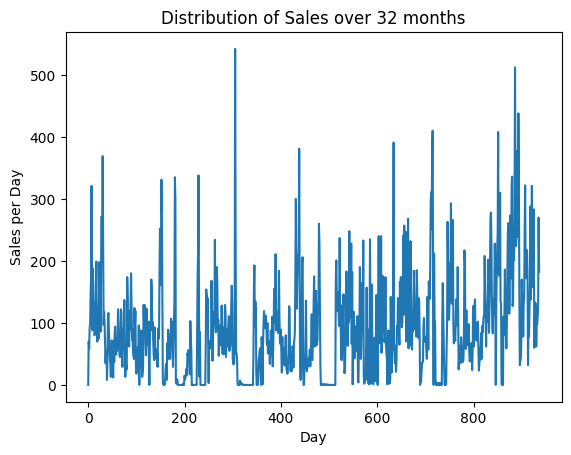

In [86]:
plt.xlabel("Day")
plt.ylabel("Sales per Day")
plt.plot(df["Sales"])
plt.title("Distribution of Sales over 32 months")

<style>
    .title{
        color: white;
        background-color: orange;
        text-align: center;
    }
</style>
<h2 class="title">3- Data Preparation</h2>

<style>
    .title{
        color: white;
        background-color: lightgreen;
        text-align: center;
        width:40%;
        margin: auto;
    }
</style>
<h4 class="title">Data Loading<h4>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
    span{
        color: violet;
        font-weight: bold;
        text-decoration: underline;
    }
    .usable{
        color: orange;
        text-decoration: underline;
    }
</style>
<div class="container">
<h5>Cette étape permet de créer une matrice X a partir de la forme vectorielle de données.
La fonction crée une ligne le taille 'seq_len' qui contient z(i+1), z(i+2), ..... z(i+seq_len) et comme taget y(i) = z(i+seq_len+1). Comme ça on Obtient une <span>matrice de caractéristiques X</span> et un <span>vecteur target Y</span> <span class="usable">utilisables par les algorithmes de Machine Learning<span>.
</h6>
</div>

In [87]:
def load_data(data,seq_len):
  X=[]
  y=[]
  for i in range(seq_len,len(data)):
    X.append(data.iloc[i-seq_len:i,1])
    y.append(data.iloc[i,1])
  return X,y
X,y=load_data(df,5)

<style>
    .title{
        color: white;
        background-color: lightgreen;
        text-align: center;
        width:40%;
        margin: auto;
    }
</style>
<h4 class="title">Data Spliting</h4>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
    span{
        color: violet;
        font-weight: bold;
        text-decoration: underline;
    }
</style>
<div class="container">
<h5>Cette étape permet de diviser le dataset en un ensemble d'entrainement (80%) et un ensemble de test (20%).
Il est important ici de garder l'ordre des entrées, pour cela il faut faire la division <span>sans shuffling</span>.
</h6>
</div>

In [88]:
X_train = X[:int(len(X)*0.8)]
y_train = y[:int(len(y)*0.8)]
X_test = X[int(len(X)*0.8):]
y_test = y[int(len(y)*0.8):]
'''
Ou on peut utiliser: X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)
'''
print('train size: ',len(X_train))
print('test size: ',len(X_test))



train size:  745
test size:  187


<style>
    .title{
        color: white;
        background-color: orange;
        text-align: center;
    }
</style>
<h2 class="title">4- Machine Learning</h2>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
</style>
<div class="container">
<h5>
Dans cette étape, nous initialisons plusieurs algorithmes de Machine Learning pour entraîner des modèles de prédiction des ventes basés sur les séries temporelles. Nous utilisons différents types de modèles, notamment la régression linéaire, les réseaux de neurones artificiels (MLP), les machines à vecteurs de support (SVM) avec différents noyaux (linéaire, RBF, sigmoïde, poly) pour explorer diverses approches de modélisation et trouver celle qui convient le mieux à nos données.
</h5>
</div>

In [89]:
#Inialization of ML algorithms
lr=LinearRegression()
neural=MLPRegressor(hidden_layer_sizes=(10,10),activation='relu',solver='lbfgs', max_iter=800)
linear_svm=SVR(kernel='linear')
rbf_svm=SVR(kernel='rbf')
sigmoid_svm=SVR(kernel='sigmoid')
poly_svm=SVR(kernel='poly',degree=2)
# Training
lr.fit(X_train,y_train)
neural.fit(X_train,y_train)
linear_svm.fit(X_train,y_train)
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
poly_svm.fit(X_train,y_train)
# Testing
y_pred_lr=lr.predict(X_test)
y_pred_neural=neural.predict(X_test)
y_pred_linear_svm=linear_svm.predict(X_test)
y_pred_rbf_svm=rbf_svm.predict(X_test)
y_pred_sigmoid_svm=sigmoid_svm.predict(X_test)
y_pred_poly_svm=poly_svm.predict(X_test)

<style>
    .title{
        color: white;
        background-color: lightgreen;
        text-align: center;
        width:40%;
        margin: auto;
    }
</style>
<h4 class="title">Performence Evaluation</h4>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
    span{
        color: violet;
        font-style: italic;
        text-decoration: underline;
    }
</style>
<div class="container">
<h5>
Dans cette étape, nous évaluons les performances de différents modèles. Pour chaque modèle, nous calculons quatres métriques de performance : <span>l'erreur quadratique moyenne (MSE)</span>, <span>l'erreur absolue moyenne (MAE)</span>, <span>l'erreur absolue moyenne en pourcentage (MAPE)</span> et <span>le coefficient de détermination (R2 Score)</span>. Ces métriques nous aident à évaluer la précision des prédictions de chaque modèle.
</h5>
</container>

In [90]:
print(" **** Performance of Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
mape=mean_absolute_percentage_error(y_test,y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_lr)
print(" **** Performance of Neural Network Regression *****")
mse=mean_squared_error(y_test,y_pred_neural)
mae=mean_absolute_error(y_test,y_pred_neural)
mape=mean_absolute_percentage_error(y_test,y_pred_neural)
r2_score_neural = r2_score(y_test, y_pred_neural)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_neural)
print(" **** Performance of SVR Linear Regression *****")
mse=mean_squared_error(y_test,y_pred_linear_svm)
mae=mean_absolute_error(y_test,y_pred_linear_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_linear_svm)
r2_score_linear_svm = r2_score(y_test, y_pred_linear_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_linear_svm)
print(" **** Performance of SVR RBF Regression *****")
mse=mean_squared_error(y_test,y_pred_rbf_svm)
mae=mean_absolute_error(y_test,y_pred_rbf_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_rbf_svm)
r2_score_rbf_svm = r2_score(y_test, y_pred_rbf_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_rbf_svm)
print(" **** Performance of SVR Sigmoid Regression *****")
mse=mean_squared_error(y_test,y_pred_sigmoid_svm)
mae=mean_absolute_error(y_test,y_pred_sigmoid_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_sigmoid_svm)
r2_score_sigmoid_svm = r2_score(y_test, y_pred_sigmoid_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_sigmoid_svm)
print(" **** Performance of SVR Polynomial Regression *****")
mse=mean_squared_error(y_test,y_pred_poly_svm)
mae=mean_absolute_error(y_test,y_pred_poly_svm)
mape=mean_absolute_percentage_error(y_test,y_pred_poly_svm)
r2_score_poly_svm = r2_score(y_test, y_pred_poly_svm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_poly_svm)

 **** Performance of Linear Regression *****
MSE=  5175.034413389148
MAE=  50.57208004538338
MAPEE=  5934803057939331.0
R2 Score=  0.35689126786655767
 **** Performance of Neural Network Regression *****
MSE=  5352.958226791852
MAE=  53.02896618922386
MAPEE=  4184814913072961.0
R2 Score=  0.3347804278385734
 **** Performance of SVR Linear Regression *****
MSE=  5448.5582744219755
MAE=  52.6927449144453
MAPEE=  4576273893183977.0
R2 Score=  0.32290007680859045
 **** Performance of SVR RBF Regression *****
MSE=  11609.609987695452
MAE=  75.38829848718288
MAPEE=  6336968019663279.0
R2 Score=  -0.4427423980859877
 **** Performance of SVR Sigmoid Regression *****
MSE=  13020.75365839387
MAE=  81.3998277515287
MAPEE=  5808023718648605.0
R2 Score=  -0.6181071868829486
 **** Performance of SVR Polynomial Regression *****
MSE=  7129.701966113554
MAE=  59.80150185327342
MAPEE=  5077070823778676.0
R2 Score=  0.11398200946189396


<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
</style>
<div class="container">
<h5>
Dans cette étape, nous visualisons les prédictions de plusieurs modèles de prédiction des ventes en fonction de la date. Chaque sous-graphique compare les valeurs réelles (en rouge) aux prédictions du modèle correspondant (en bleu). Cette visualisation nous permet d'évaluer visuellement la performance de chaque modèle et de comparer leurs capacités de prédiction sur notre ensemble de données de test.
</h5>
</container>

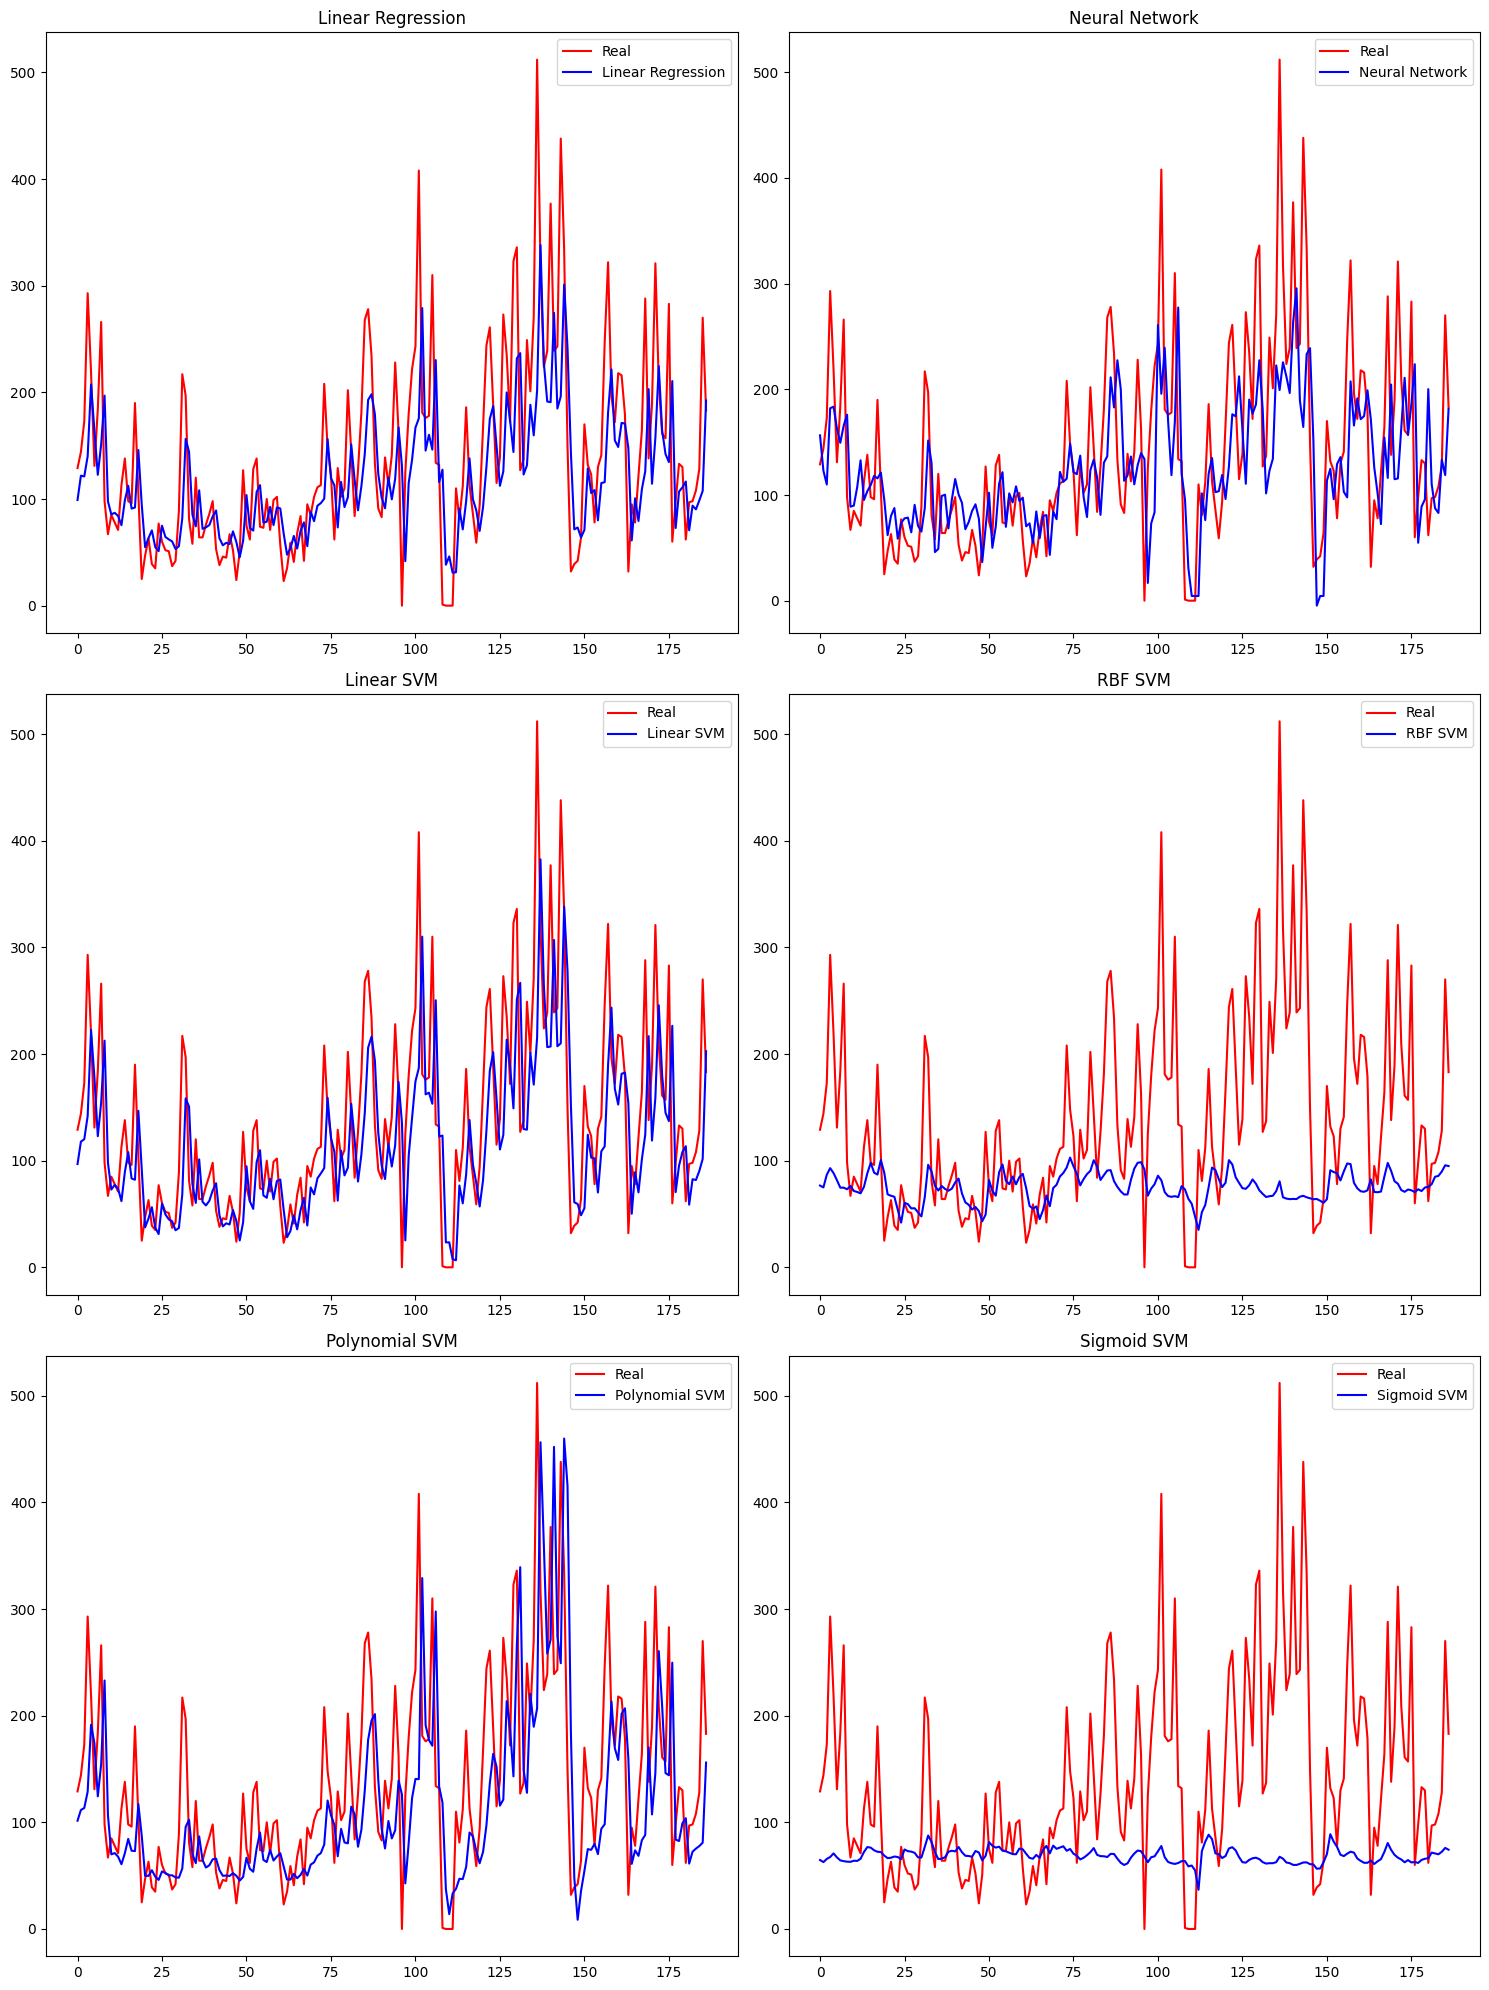

In [91]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Plot Linear Regression predictions
axs[0, 0].plot(y_test, color='red', label='Real')
axs[0, 0].plot(y_pred_lr, label='Linear Regression', color='blue')
axs[0, 0].set_title('Linear Regression')
axs[0, 0].legend()

# Neural Network predictions
axs[0, 1].plot(y_test, color='red', label='Real')
axs[0, 1].plot(y_pred_neural, label='Neural Network', color='blue')
axs[0, 1].set_title('Neural Network')
axs[0, 1].legend()

# Linear SVM predictions
axs[1, 0].plot(y_test, color='red', label='Real')
axs[1, 0].plot(y_pred_linear_svm, label='Linear SVM', color='blue')
axs[1, 0].set_title('Linear SVM')
axs[1, 0].legend()

# RBF SVM predictions
axs[1, 1].plot(y_test, color='red', label='Real')
axs[1, 1].plot(y_pred_rbf_svm, label='RBF SVM', color='blue')
axs[1, 1].set_title('RBF SVM')
axs[1, 1].legend()

# Polynomial SVM predictions
axs[2, 0].plot(y_test, color='red', label='Real')
axs[2, 0].plot(y_pred_poly_svm, label='Polynomial SVM', color='blue')
axs[2, 0].set_title('Polynomial SVM')
axs[2, 0].legend()

# Sigmoid SVM predictions
axs[2, 1].plot(y_test, color='red', label='Real')
axs[2, 1].plot(y_pred_sigmoid_svm, label='Sigmoid SVM', color='blue')
axs[2, 1].set_title('Sigmoid SVM')
axs[2, 1].legend()


plt.tight_layout()

plt.show()


<style>
    .title{
        color: white;
        background-color: orange;
        text-align: center;
    }
</style>
<h2 class="title">5- Deep Learning<h2>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        flex-direction: column;
        width: 95%;
    }
</style>
<div class="container">
<h5>
Premièrement, nous préparons les données pour l'entraînement des modèles LSTM et GRU en les convertissant en tableaux numpy et en les remodelant pour les adapter à l'entrée des modèles de Deep Learning.
</h5>
<label style="width: 70%;background-color: lightgreen;height: 2px;margin: auto;"></label>
<h5>
Nous utilisons ensuite ces données pour initialiser et entraîner deux modèles de réseaux de neurones récurrents (LSTM et GRU).
</h5>
</container>

In [92]:
#
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#initilization des modèles
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1, activation='relu'))
lstm_model.compile(optimizer='adam', loss='mse')


gru_model = Sequential()
gru_model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(1, activation='relu'))
gru_model.compile(optimizer='adam', loss='mse')

# entrainer les modèles
lstm_model.fit(X_train, y_train, epochs=200, batch_size=32)
gru_model.fit(X_train, y_train, epochs=200, batch_size=32)

# Test des modèles sur l'ensemble de test
predictions_gru = gru_model.predict(X_test)
predictions_lstm = lstm_model.predict(X_test)

Epoch 1/200


c:\Users\kmail\anaconda3\envs\projet_fouille\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7516.8228
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5198.9409 
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3810.8496 
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3536.9578 
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3732.4275 
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3956.0146 
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3260.6716 
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3050.2239 
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3088.7935 
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3155.1113 
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3095.4260 
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3039.3037 
Epoch 13/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2818.3521 
Epoch 14/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2824.6208 
Epoch 15/200
24/24 ━━━━━━━━━

<style>
    .title{
        color: white;
        background-color: lightgreen;
        text-align: center;
        width:40%;
        margin: auto;
    }
</style>
<h4 class="title">Performence Evaluation</h4>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
</style>
<div class="container">
<h5>Dans cette étape, nous évaluons les performances des modèles LSTM et GRU pour la prédiction des ventes en fonction de la date en utilisant plusieurs métriques. Pour chaque modèle, nous calculons l'erreur quadratique moyenne (MSE), l'erreur absolue moyenne (MAE), l'erreur absolue moyenne en pourcentage (MAPE) et le score R2. Ces métriques nous permettent d'évaluer la précision des prédictions de chaque modèle par rapport aux valeurs réelles de ventes.
</h5>
</container>

In [93]:
print(" **** Performance of LSTM Regression (Deep Learning) *****")
mse=mean_squared_error(y_test,predictions_lstm)
mae=mean_absolute_error(y_test,predictions_lstm)
mape=mean_absolute_percentage_error(y_test,predictions_lstm)
r2_score_lstm=r2_score(y_test,predictions_lstm)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_lstm)
print(" **** Performance of GRU Regression (Deep Learning) *****")
mse=mean_squared_error(y_test,predictions_gru)
mae=mean_absolute_error(y_test,predictions_gru)
mape=mean_absolute_percentage_error(y_test,predictions_gru)
r2_score_gru=r2_score(y_test,predictions_gru)
print("MSE= ",mse)
print("MAE= ",mae)
print("MAPEE= ",mape)
print("R2 Score= ",r2_score_gru)

 **** Performance of LSTM Regression (Deep Learning) *****
MSE=  7369.862064578372
MAE=  62.248895094356435
MAPEE=  3462547143976446.0
R2 Score=  0.0841369796330772
 **** Performance of GRU Regression (Deep Learning) *****
MSE=  6755.569601092863
MAE=  60.51409675475748
MAPEE=  3128837096560191.5
R2 Score=  0.1604759593950631


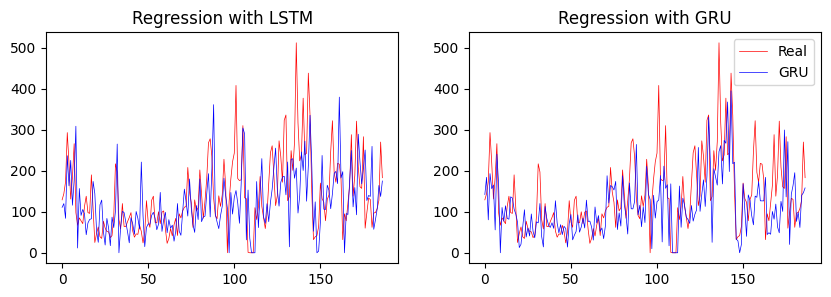

In [94]:

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(y_test, color='red', label='Real',linewidth= '0.5')
axs[0].plot(predictions_lstm, label='LSTM', color='blue',linewidth= '0.5')
axs[0].set_title('Regression with LSTM')
axs[1].plot(y_test, color='red', label='Real',linewidth= '0.5')
axs[1].plot(predictions_gru, label='GRU', color='blue',linewidth= '0.5')
axs[1].set_title('Regression with GRU')


plt.legend()

<style>
    .title{
        color: white;
        background-color: orange;
        text-align: center;
    }
</style>
<h2 class="title">6- Deploiement<h2>

<style>
    .container{
        border: 2px solid lightgreen;
        padding: 10px;
        display: flex;
        width: 95%;
    }
</style>
<div class="container">
<h5>
Dans cette étape, nous évaluons et comparons les performances des différents modèles de prédiction des ventes en fonction de la date en utilisant le score R2 et sauvegardons le meilleur modèle dans un fichier "best_forecasting_model.pickle" à l'aide de la bibliothèque pickle.
</h5>
</container>

r2 score of the best model:  0.35689126786655767


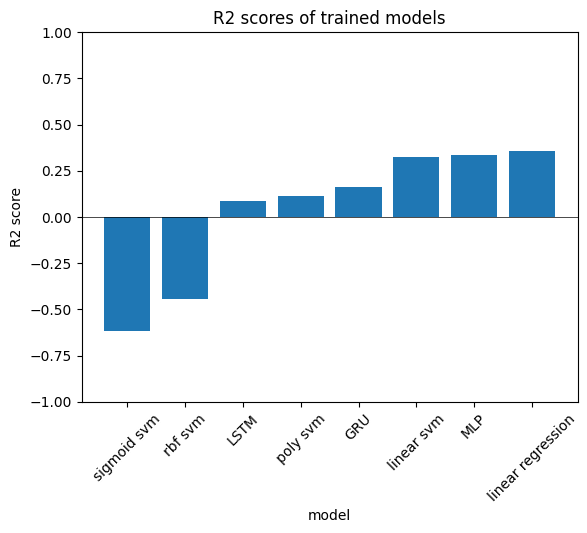

In [95]:
models_list = [
    (lr,r2_score_lr,'linear regression'),
    (linear_svm,r2_score_linear_svm, 'linear svm'),
    (poly_svm,r2_score_poly_svm, 'poly svm'),
    (rbf_svm,r2_score_rbf_svm, 'rbf svm'),
    (sigmoid_svm,r2_score_sigmoid_svm, 'sigmoid svm'),
    (neural,r2_score_neural, 'MLP'),
    (lstm_model,r2_score_lstm, 'LSTM'),
    (gru_model,r2_score_gru, 'GRU'),
]
sorted_models_list = sorted(models_list, key=lambda t: t[1])

best_model = sorted_models_list[-1][0]
print("r2 score of the best model: ",sorted_models_list[-1][1])
pickle.dump(best_model,open('best_forecasting_model.pickle','wb'))

_ , scores, names = zip(*sorted_models_list)

# visualisation des R2 scores de chaque modèle (triés)
 
plt.bar(names, scores)
plt.xlabel('model')
plt.ylabel('R2 score')
plt.title('R2 scores of trained models')
plt.ylim(-1, 1)
plt.xticks(rotation=45)

plt.axhline(0, color='black', linewidth= 0.5)

plt.show()